In [47]:
# Dataset - https://www.kaggle.com/kabure/wine-review-s-eda-recommend-systems

### I will try answer a batch of questions, like:
- Have an Provinces the same number of wines?
- Whats the distribuition of Price and Points by Province?
- Whats the country distribuition
- The taster's have the same number of votings?
- What's the distribuition of Points and Prices by taster's name?
- Taking a look on the word clouds.

## Importing Libraries

In [48]:
# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for statistical analysis
from scipy import stats
from scipy.stats import skew, kurtosis

# for ignoring warnings
import warnings
warnings.filterwarnings(action='ignore')

## Functions def

In [49]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Unique'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name']==name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True),base=2),2)
    return summary

def CalcOutliers(df_num):
    '''
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical features that you set on input
    '''
    # calculating Mean and Standard Deviation on an Array
    data_mean, data_std = np.mean(df_num), np.std(df_num)
    
    # setting cut line to both higher and lower values
    # you can change this value
    cut = data_std*3
    
    # Calculating the higher and lower cut values
    lower, upper = data_mean-cut, data_mean+cut
    
    # creating an array of lower, higher and total outlier values
    outliers_lower = [x for x in df_num if x<lower]
    outliers_higher = [x for x in df_num if x>upper]
    outliers_total = [x for x in df_num if x<lower or x>upper]
    
    # array without outlier values
    outlier_removed = [x for x in df_num if x>lower and x<upper]
    print('Identified lowest outliers: %d' % len(outliers_lower))# print total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # print total number of values in upper cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # print total number of outliers on both sides
    print('Non-outlier observations: %d' % len(outlier_removed)) # print total number of non-outlier values
    print('Total percentage of Outliers: ', round((len(outliers_total)/len(outlier_removed))*100,4))# percentual of outliers in points
    
    return

In [50]:
# Importing our dataset in variable df_wine1
df_wine1 = pd.read_csv('winemag-data-130k-v2.csv')

### Let's take a first look on our data.

- A simple histogram can be a great first step in understanding a dataset.
- I will start with univariate analysis and after it, I will cross some features by the numerical

In [51]:
resumetable(df_wine1)

Dataset Shape: (129971, 14)


,Name,dtypes,Missing,Unique,First Value,Second Value,Third Value,Entropy
0,Unnamed: 0,int64,0,129971,0,1,2,16.99
1,country,object,63,43,Italy,Portugal,US,2.77
2,description,object,0,119955,"Aromas include tropical fruit, broom, brimston...","This is ripe and fruity, a wine that is smooth...","Tart and snappy, the flavors of lime flesh and...",16.83
3,designation,object,37465,37979,Vulkà Bianco,Avidagos,NaN,13.83
4,points,int64,0,21,87,87,87,3.64
5,price,float64,8996,390,NaN,15.0,14.0,5.77
6,province,object,63,425,Sicily & Sardinia,Douro,Oregon,5.05
7,region_1,object,21247,1229,Etna,NaN,Willamette Valley,7.89
8,region_2,object,79460,17,NaN,NaN,Willamette Valley,3.28
9,taster_name,object,26244,19,Kerin O’Keefe,Roger Voss,Paul Gregutt,3.39


### Let's start looking the distribuition of Points and Prices


In [52]:
# The fucntion described is focused on numerical features
# in this case are points and price
print('Statistics Of Numerical Data: ')
print(df_wine1.describe())

Statistics Of Numerical Data: 
          Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000


### Very interesting distribuition of Points and Price.

- We can see that the values of points are distributed between 80 and 100
- The price have a high difference between the values and a high standard deviation
- In prices, the IQR (Interquantil Range) is 25. The max value is 3300


We will explore it further later, lets start.



### Points Distribution
- I will start exploring points and after I will see the same on price
- Let's see the points distributions and quantiles

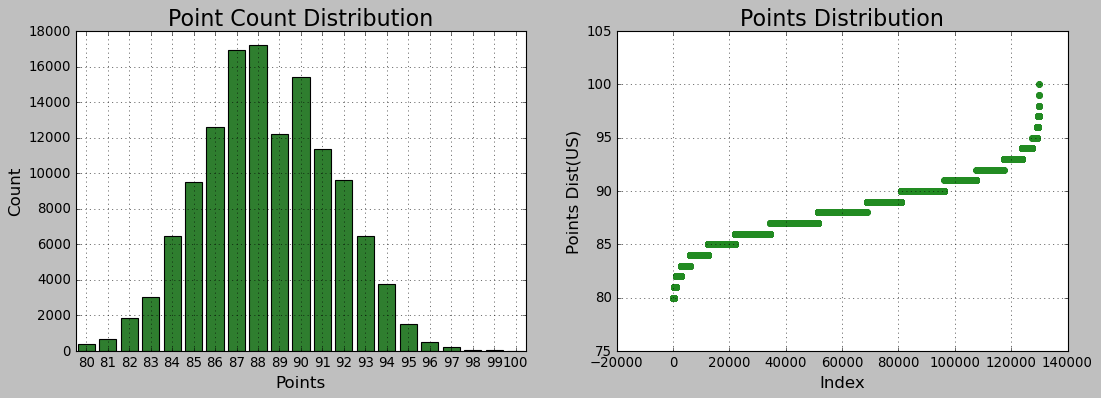

In [53]:
# define the size of figure that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 cols
g=sns.countplot(data=df_wine1, x='points', color='forestgreen') # setting the seaborn countplot to known the points distribution
g.set_title('Point Count Distribution', fontsize=20) # setting title and size of font
g.set_xlabel('Points', fontsize=15) # setting xlabel and size of font
g.set_ylabel('Count', fontsize=15) # setting ylabel and size of font
plt.grid()

plt.subplot(1,2,2) # this will set the second graphic of our grid
plt.scatter(x=range(df_wine1.shape[0]), y=np.sort(df_wine1.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15) # setting xlabel and font size
plt.ylabel('Points Dist(US)', fontsize=15) # setting ylabel and font size
plt.title('Points Distribution', fontsize=20) # setting title and size of font
plt.grid()
plt.show() # rendering the graph

We can clearly see the distribuitioon of the data. It seems very similar with a normal distribution.

Just a few number of wines have less than 82 points and more than 95 points.

As Points are one of the most important metrics in this dataset, I will explore it furthuer more.

I will find for more important informations like quantiles and maybe try to set wines in categories based on it

## Let's set the points into categories.
I will create a new feature containing the range of the points with a rank to this pontuations

In [54]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df_wine1['rating_cat']=df_wine1['points'].apply(cat_points)

## Ploting Rating categories
Let's see the distribution after the transformation

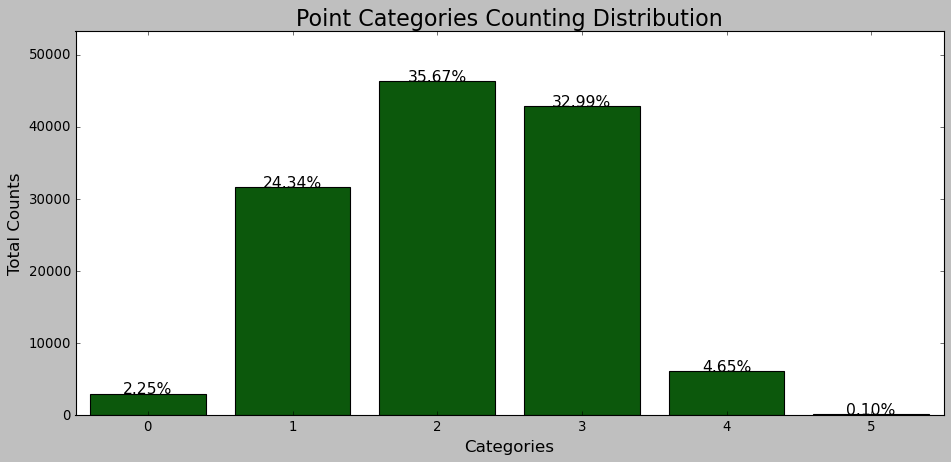

In [55]:
total = len(df_wine1)
plt.figure(figsize=(14,6))

g=sns.countplot(data=df_wine1, x='rating_cat', color='darkgreen')
g.set_title('Point Categories Counting Distribution', fontsize=20)
g.set_xlabel('Categories', fontsize=15)
g.set_ylabel('Total Counts', fontsize=15)

sizes=[]

for p in g.patches:
    height=p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center', fontsize=14)

g.set_ylim(0,max(sizes)*1.15)
plt.show()

Nice! Now we can have a clearly understand of our data in a more clean way. It could be interesting to compare each other regions;

## Detecting Outlier Points

In [56]:
CalcOutliers(df_wine1['points'])

Identified lowest outliers: 0
Identified upper outliers: 129
Identified outliers: 129
Non-outlier observations: 129842
Total percentage of Outliers:  0.0994


Very interesting informations!

We can see that all outliers of this feature is in upper values.

Also, we have less than 0,01% of outlier values in points.... Just 129 wines have more than 98 points.

We will apply it on Price too... Let's start the understanding of it now.

## Price Distribution

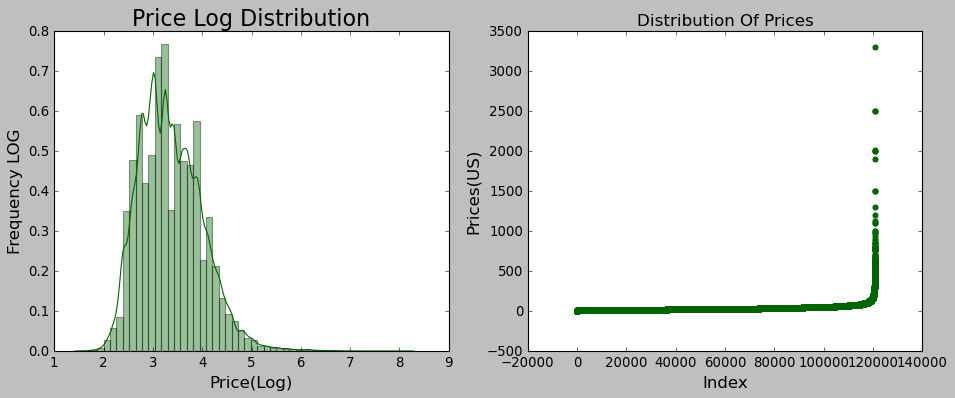

In [57]:
plt.figure(figsize=(14,5))

g1=plt.subplot(1,2,1)
g1=sns.distplot(np.log(df_wine1['price'].dropna()+1), color='darkgreen') # +1 is used to ensure that all values being logged are positive, 
# thus avoiding mathematical errors and making the data suitable for logarithmic transformation.
g1.set_title('Price Log Distribution', fontsize=20)
g1.set_xlabel('Price(Log)', fontsize=15)
g1.set_ylabel('Frequency LOG', fontsize=15)

plt.subplot(1,2,2)
plt.scatter(x=range(df_wine1.shape[0]), y=np.sort(df_wine1.price.values), color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title('Distribution Of Prices', fontsize=15)

plt.show()

Nice!!! The Price Log give us an impression that the data could normaly distributed, but like in points, we need to test.

### Outliers in Prices

In [58]:
CalcOutliers(df_wine1['price'])

Identified lowest outliers: 0
Identified upper outliers: 1177
Identified outliers: 1177
Non-outlier observations: 119798
Total percentage of Outliers:  0.9825


Cool. Now we can clearly see that we have less than 1% of outliers, that is 1177 prices that is out of our range

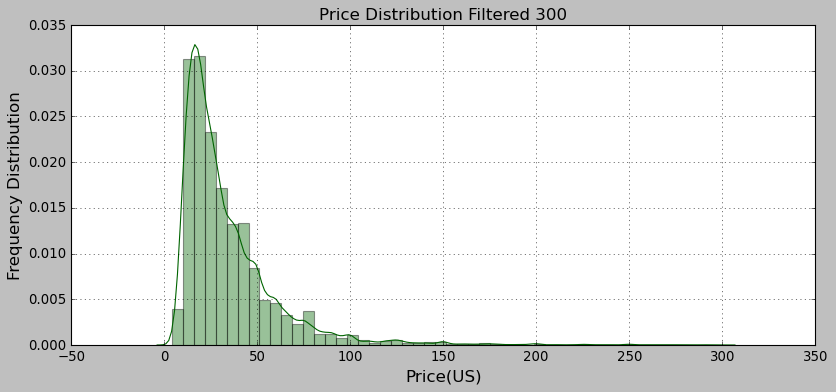

In [59]:
plt.figure(figsize=(12,5))

g=sns.distplot(df_wine1[df_wine1['price']<300]['price'], color='darkgreen')
g.set_title('Price Distribution Filtered 300', fontsize=15)
g.set_xlabel('Price(US)', fontsize=15)
g.set_ylabel('Frequency Distribution', fontsize=15)
plt.grid()
plt.show()

Nice. It confirms what we saw in the above exploration. The greastest part of all analyzed wines have values under $100



In [60]:
# Let's get the price_log to better work with this feature
df_wine1['price_log']=np.log(df_wine1['price'])

### Crossing prices and points

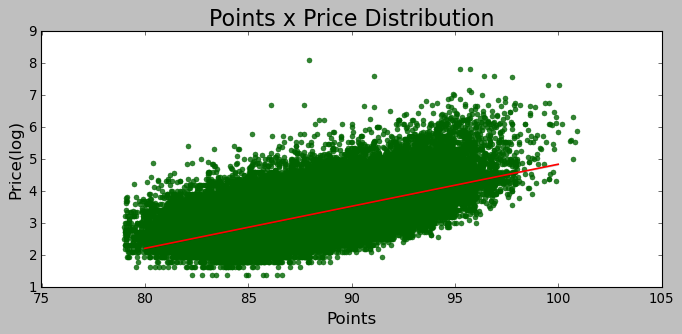

In [61]:
plt.figure(figsize=(10,4))

g=sns.regplot(data=df_wine1, x='points', y='price_log',
             line_kws={'color':'red'}, x_jitter=True,
             fit_reg=True, color='darkgreen')
g.set_title('Points x Price Distribution', fontsize=20)
g.set_xlabel('Points', fontsize=15)
g.set_ylabel('Price(log)', fontsize=15)

plt.show()

Very meaningful scatter plot.

- The highest prices isn't of the wine with highest pontuation.
- The most expensive wine have ponctuation between 87 and 90
- Maybe it would be interesting to build an recommender system to find cheapest wines with the same quality.

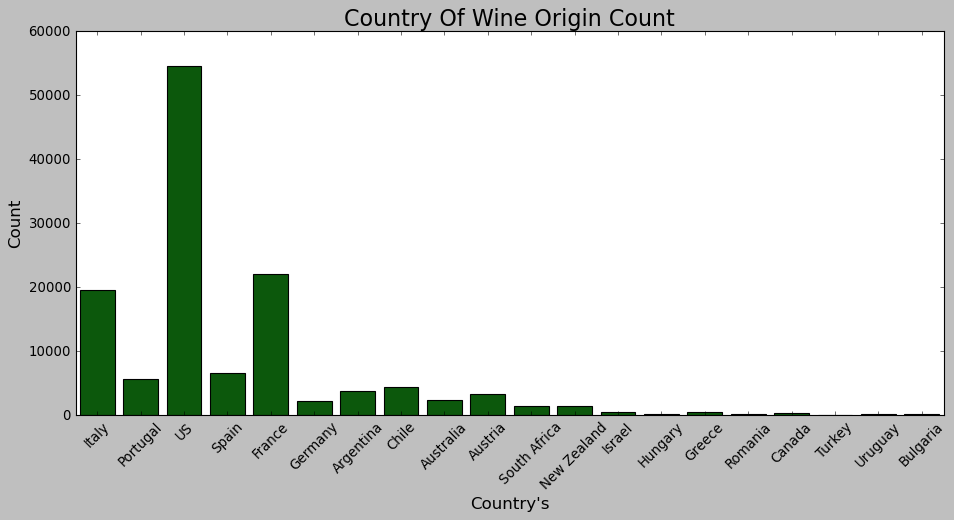

In [62]:
plt.figure(figsize=(14,6))

country = df_wine1['country'].value_counts()[:20]
g=sns.countplot(data=df_wine1[df_wine1.country.isin(country.index.values)],
                x='country', color='darkgreen')
g.set_title('Country Of Wine Origin Count', fontsize=20)
g.set_xlabel("Country's", fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.show()

Wow, very interesting distribuition. I was expecting to see Italy, Chile or Argentina as the biggest wine productor.
If you want take a better look, look the print output below

### Now, I will take a look in the distribuition of this top 20 countrys by price and rating

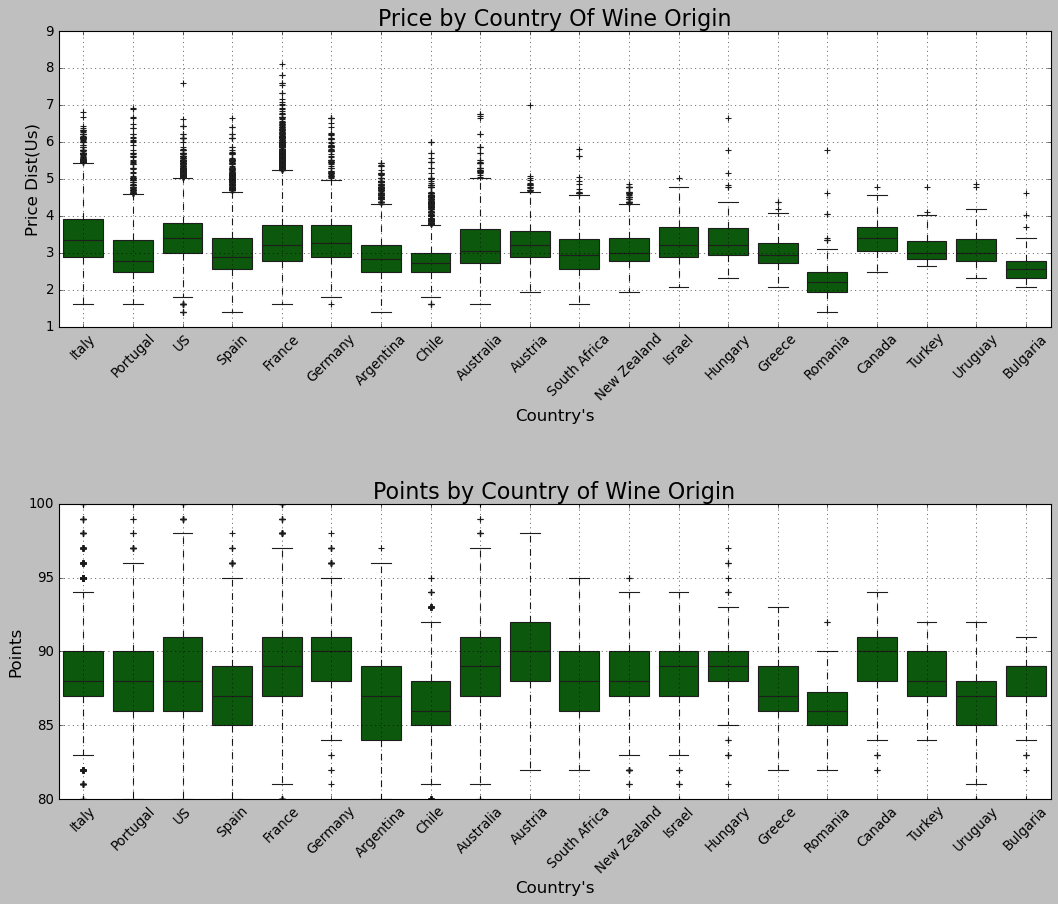

In [63]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g=sns.boxplot(data=df_wine1.loc[(df_wine1.country.isin(country.index.values))],
              x='country', y='price_log', color='darkgreen')
g.set_title('Price by Country Of Wine Origin', fontsize=20)
g.set_xlabel("Country's", fontsize=15)
g.set_ylabel('Price Dist(Us)', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.grid()

plt.subplot(2,1,2)
g1=sns.boxplot(data=df_wine1.loc[(df_wine1.country.isin(country.index.values))],
              x='country', y='points', color='darkgreen')
g1.set_title('Points by Country of Wine Origin', fontsize=20)
g1.set_xlabel("Country's", fontsize=15)
g1.set_ylabel('Points', fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.6, top=0.9)
plt.grid()
plt.show()

### Taking a look on values lowest than 500

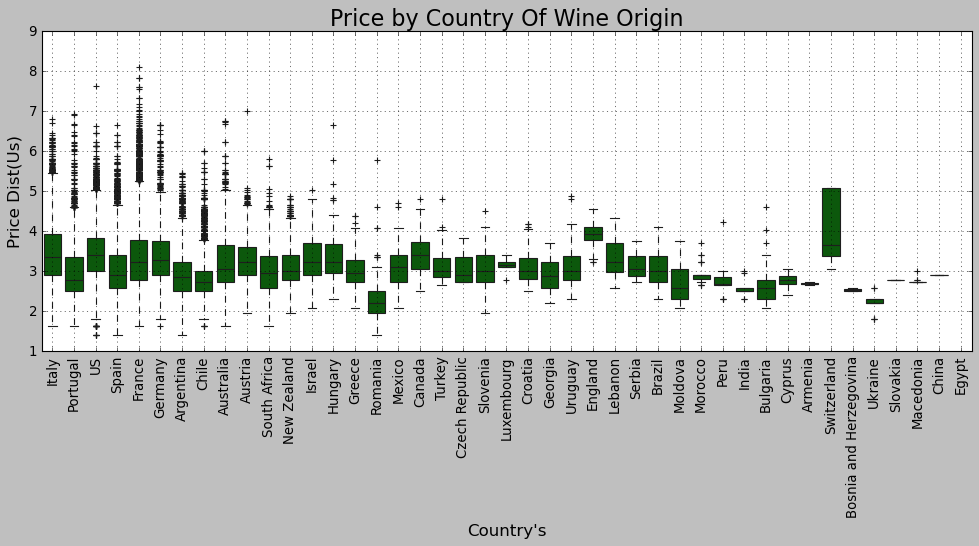

In [64]:
plt.figure(figsize=(15,5))

g=sns.boxplot(data=df_wine1, x='country', y='price_log', color='darkgreen')
g.set_title('Price by Country Of Wine Origin', fontsize=20)
g.set_xlabel("Country's", fontsize=15)
g.set_ylabel("Price Dist(Us)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.grid()
plt.show()

It's very interesting that all wines have quartiles in a values lower than 100



### Province Exploration

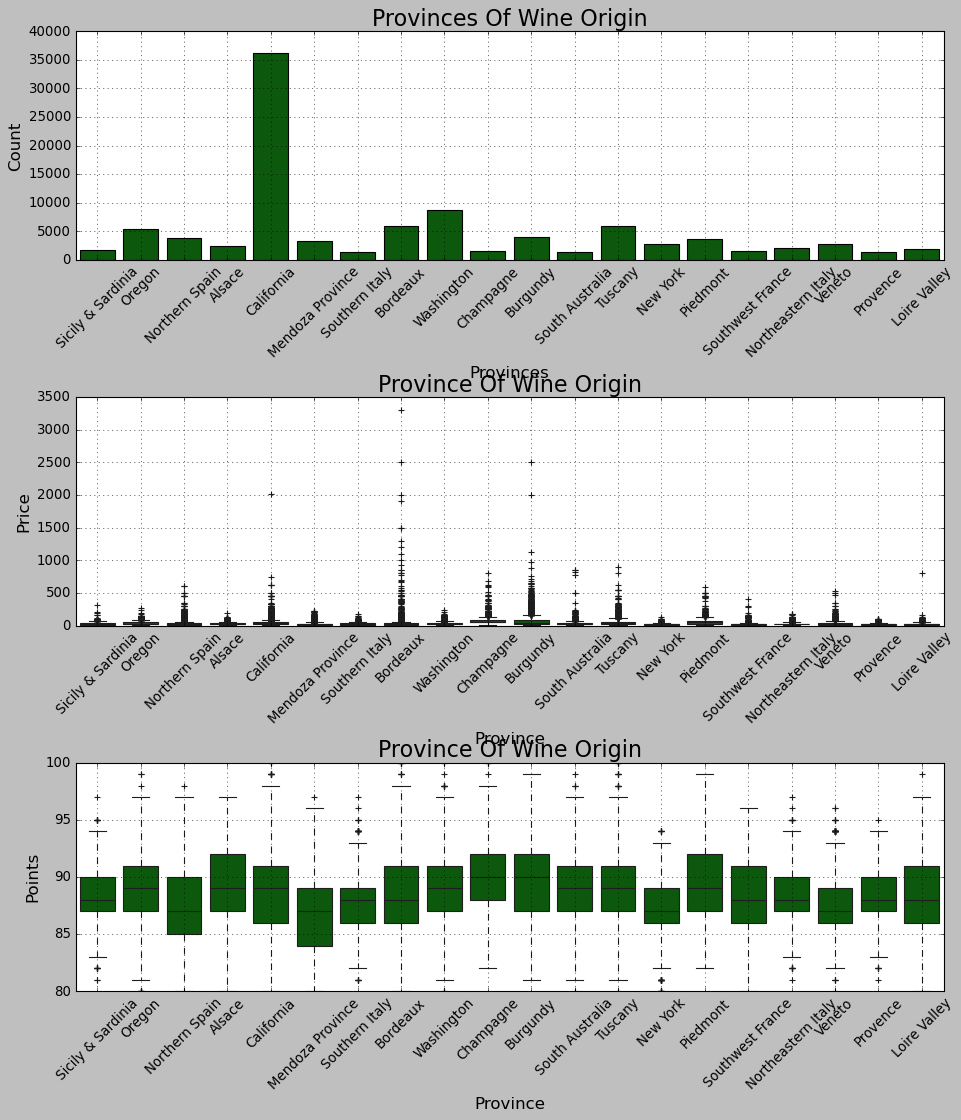

In [65]:
plt.figure(figsize=(14,15))

provinces=df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g=sns.countplot(data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))],
                x='province', color='darkgreen')
g.set_title('Provinces Of Wine Origin', fontsize=20)
g.set_xlabel('Provinces', fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.grid()

plt.subplot(3,1,2)
g1=sns.boxplot(data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))],
              x='province', y='price', color='darkgreen')
g1.set_title('Province Of Wine Origin', fontsize=20)
g1.set_xlabel('Province', fontsize=15)
g1.set_ylabel('Price', fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
plt.grid()

plt.subplot(3,1,3)
g2=sns.boxplot(data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))],
              x='province', y='points', color='darkgreen')
g2.set_title('Province Of Wine Origin', fontsize=20)
g2.set_xlabel('Province', fontsize=15)
g2.set_ylabel('Points', fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(), rotation=45)
plt.grid()

plt.subplots_adjust(hspace=0.6, top=0.9)

plt.show()

### Taster Feature

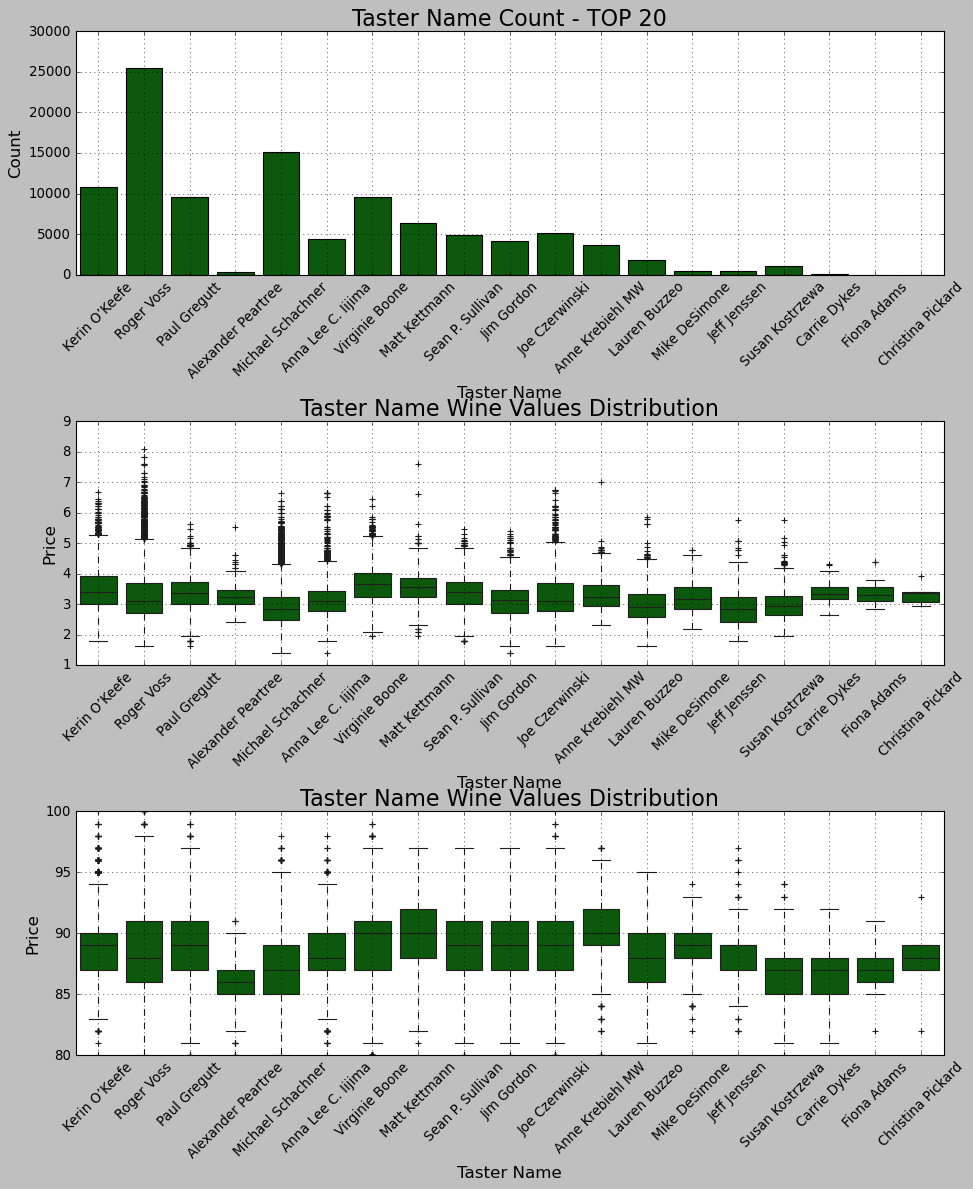

In [66]:
plt.figure(figsize=(14,16))

provinces=df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g=sns.countplot(data=df_wine1, x='taster_name', color='darkgreen')
g.set_title('Taster Name Count - TOP 20', fontsize=20)
g.set_xlabel('Taster Name', fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.grid()

plt.subplot(3,1,2)
g1=sns.boxplot(data=df_wine1, x='taster_name', y='price_log', color='darkgreen')
g1.set_title('Taster Name Wine Values Distribution', fontsize=20)
g1.set_xlabel('Taster Name', fontsize=15)
g1.set_ylabel('Price', fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
plt.grid()

plt.subplot(3,1,3)
g1=sns.boxplot(data=df_wine1, x='taster_name', y='points', color='darkgreen')
g1.set_title('Taster Name Wine Values Distribution', fontsize=20)
g1.set_xlabel('Taster Name', fontsize=15)
g1.set_ylabel('Price', fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
plt.grid()

plt.subplots_adjust(hspace=0.6, top=0.9)

plt.show()

### DESIGNATION FEATURE

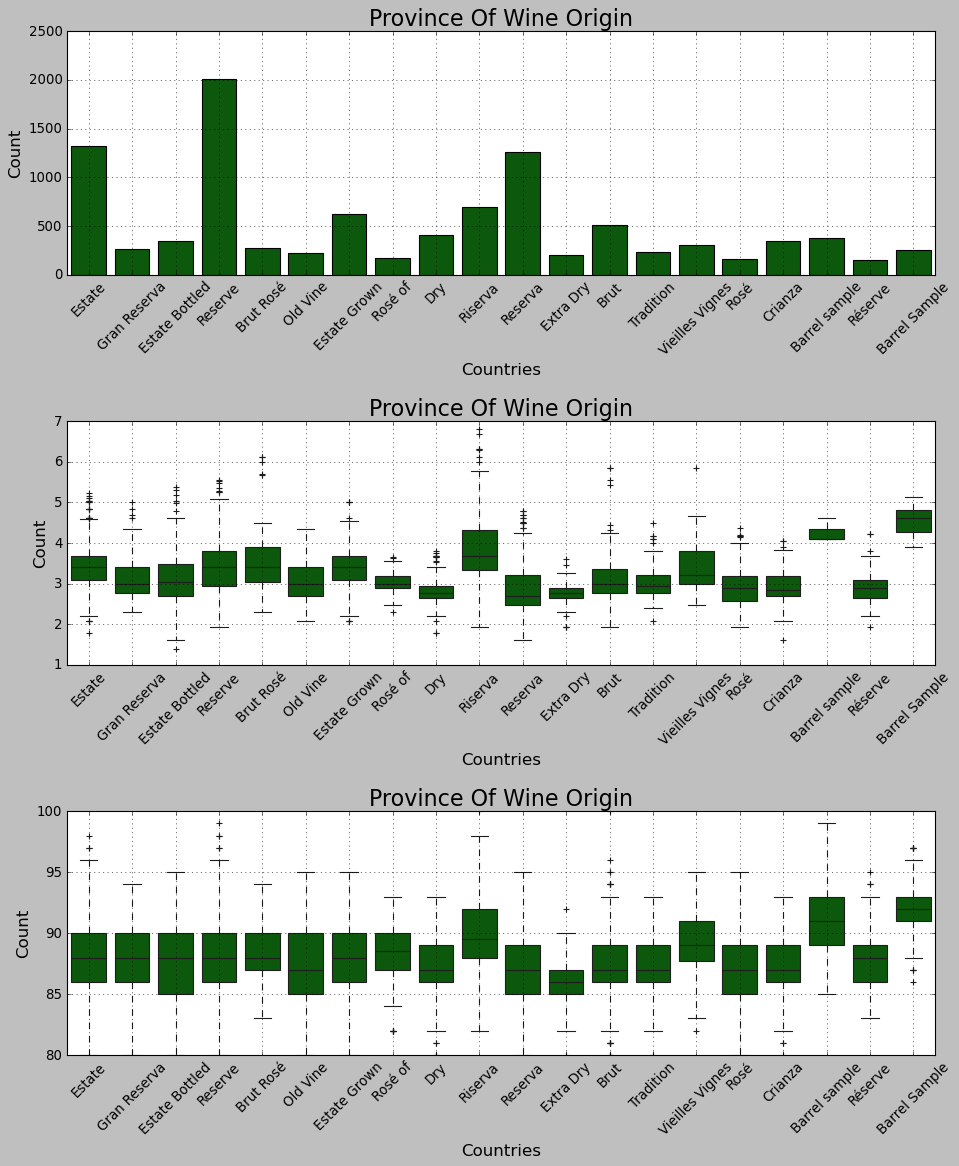

In [67]:
plt.figure(figsize=(14,16))

designation = df_wine1['designation'].value_counts()[:20]

plt.subplot(3,1,1)
g=sns.countplot(data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
               x='designation', color='darkgreen')
g.set_title('Province Of Wine Origin', fontsize=20)
g.set_xlabel('Countries', fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.grid()
                
plt.subplot(3,1,2)
g1=sns.boxplot(data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
                x='designation', y='price_log', color='darkgreen')
g1.set_title('Province Of Wine Origin', fontsize=20)
g1.set_xlabel('Countries', fontsize=15)
g1.set_ylabel('Count', fontsize=15)
g1.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.grid()

plt.subplot(3,1,3)
g2=sns.boxplot(data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
                x='designation', y='points', color='darkgreen')
g2.set_title('Province Of Wine Origin', fontsize=20)
g2.set_xlabel('Countries', fontsize=15)
g2.set_ylabel('Count', fontsize=15)
g2.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.grid()

plt.subplots_adjust(hspace=0.6, top=0.9)

plt.show()

### VARIETY FEATURE

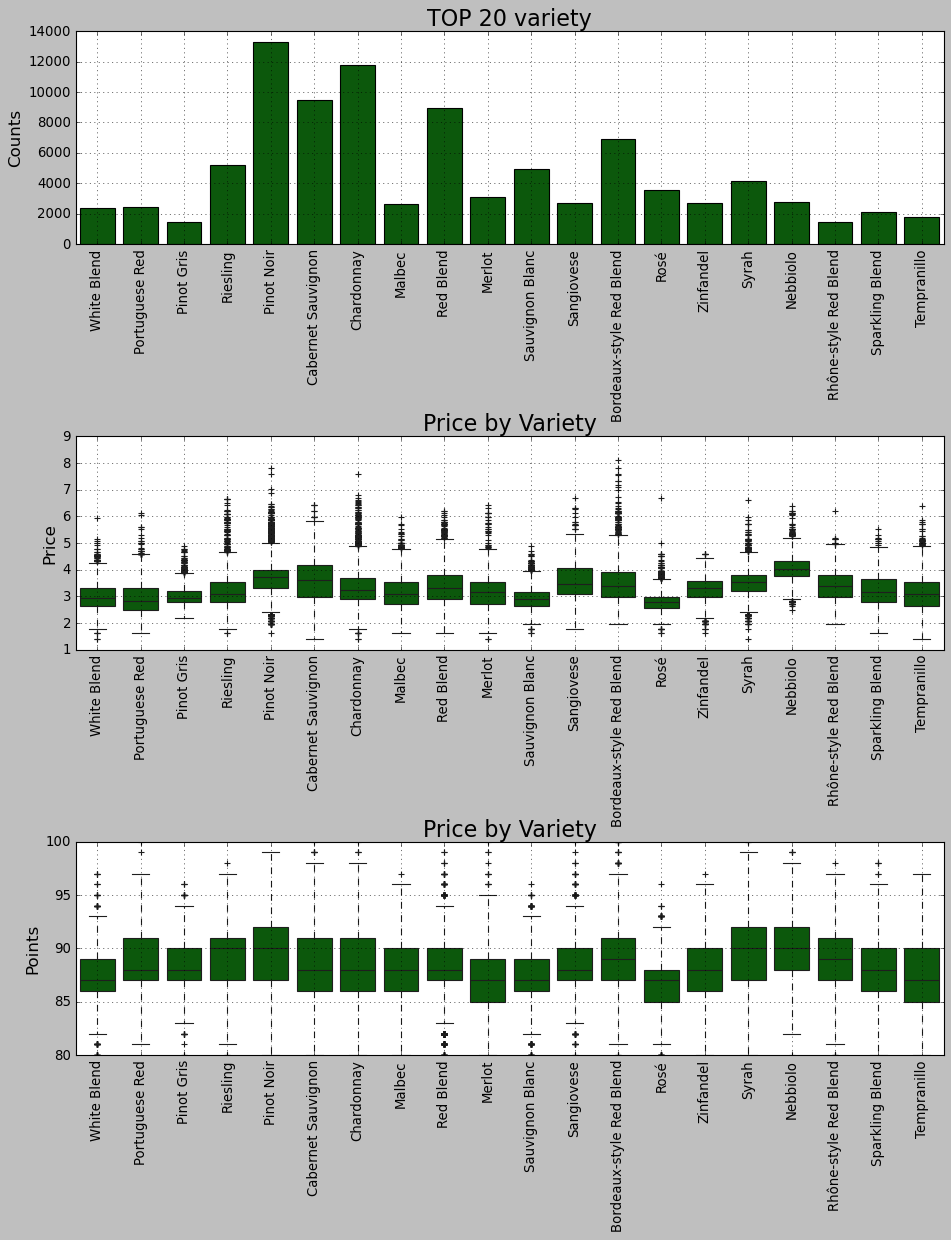

In [68]:
plt.figure(figsize=(14,16))

variety = df_wine1['variety'].value_counts()[:20]

plt.subplot(3,1,1)
g=sns.countplot(data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))],
               x='variety', color='darkgreen')
g.set_title('TOP 20 variety', fontsize=20)
g.set_xlabel('', fontsize=15)
g.set_ylabel('Counts', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.grid()

plt.subplot(3,1,2)
g1=sns.boxplot(data=df_wine1.loc[df_wine1.variety.isin(variety.index.values)],
              x='variety', y='price_log', color='darkgreen')
g1.set_title('Price by Variety', fontsize=20)
g1.set_xlabel('', fontsize=15)
g1.set_ylabel('Price', fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
plt.grid()

plt.subplot(3,1,3)
g2=sns.boxplot(data=df_wine1.loc[df_wine1.variety.isin(variety.index.values)],
              x='variety', y='points', color='darkgreen')
g2.set_title('Price by Variety', fontsize=20)
g2.set_xlabel('', fontsize=15)
g2.set_ylabel('Points', fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
plt.grid()

plt.subplots_adjust(hspace=0.9, top=0.9)

plt.show()

### Let's take a look at Winery Distribuitions

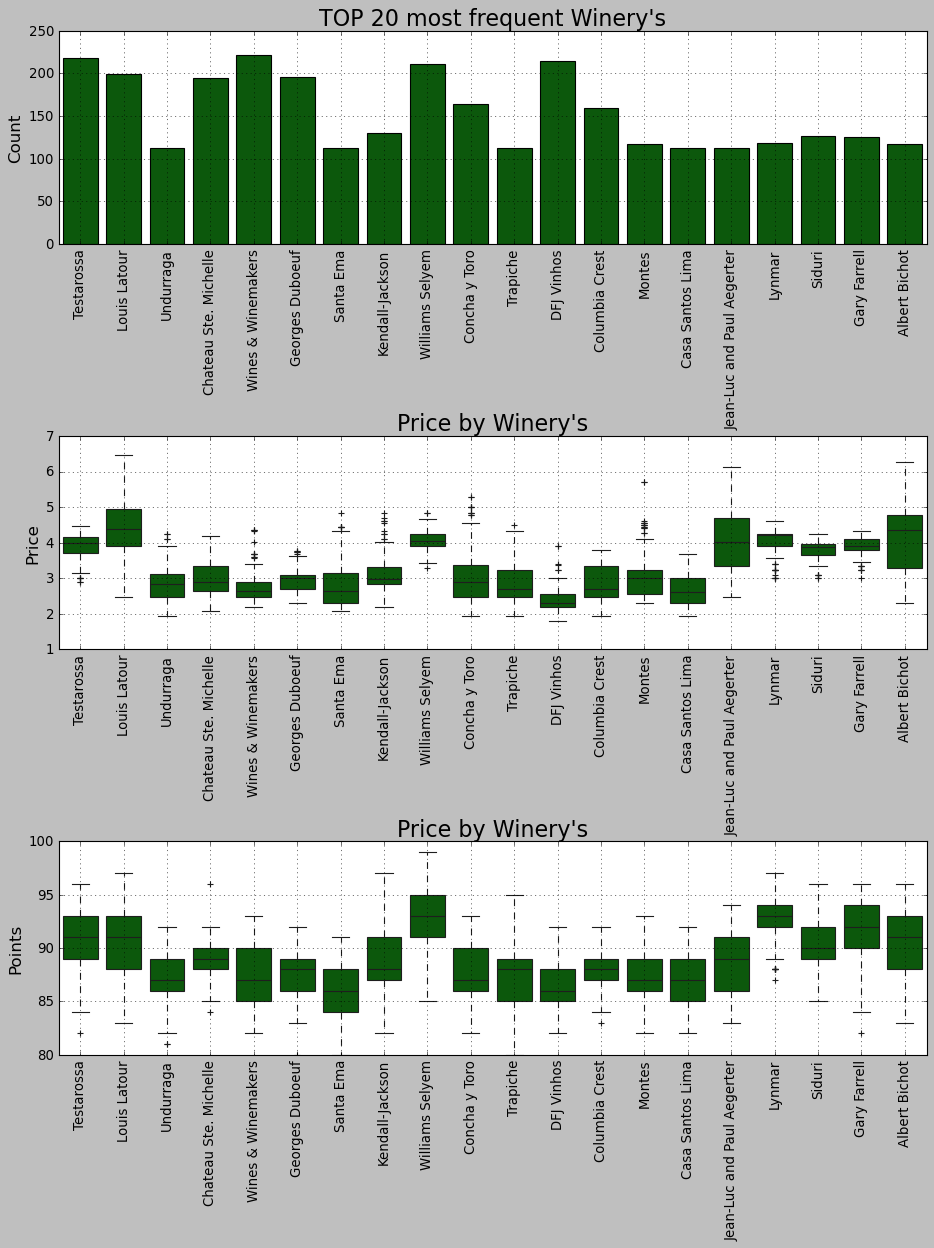

In [69]:
plt.figure(figsize=(14,16))

winery = df_wine1['winery'].value_counts()[:20]

plt.subplot(3,1,1,)
g=sns.countplot(data=df_wine1.loc[df_wine1.winery.isin(winery.index.values)],
               x='winery', color='darkgreen')
g.set_title("TOP 20 most frequent Winery's", fontsize=20)
g.set_xlabel('', fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.grid()

plt.subplot(3,1,2)
g1=sns.boxplot(data=df_wine1.loc[df_wine1.winery.isin(winery.index.values)],
              x='winery', y='price_log', color='darkgreen')
g1.set_title("Price by Winery's", fontsize=20)
g1.set_xlabel('', fontsize=15)
g1.set_ylabel('Price', fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
plt.grid()

plt.subplot(3,1,3)
g2=sns.boxplot(data=df_wine1.loc[df_wine1.winery.isin(winery.index.values)],
              x='winery', y='points', color='darkgreen')
g2.set_title("Price by Winery's", fontsize=20)
g2.set_xlabel('', fontsize=15)
g2.set_ylabel('Points', fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
plt.grid()

plt.subplots_adjust(hspace=0.9, top=0.9)

plt.show()

We can see that some winery's have +- 200 label in his portfolio's.

Also, we can verify that Willians Selyem have highest points distribuition

Better understanding the lenght of reviews



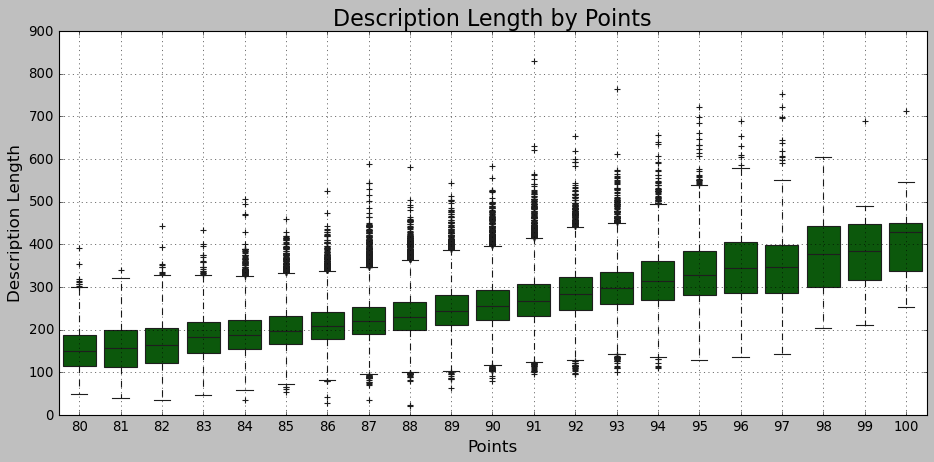

In [70]:
df_wine1 = df_wine1.assign(desc_length=df_wine1['description'].apply(len))

plt.figure(figsize=(14,6))

g=sns.boxplot(data=df_wine1, x='points', y='desc_length', color='darkgreen')
g.set_title('Description Length by Points', fontsize=20)
g.set_xlabel('Points', fontsize=15)
g.set_ylabel('Description Length', fontsize=15)
plt.grid()

plt.show()

Very cool! We can see that the wine's with highest points also have the biggest descriptions length. It's very interesting to understand.

### Who are the sommeliers with the biggest descriptions length?!

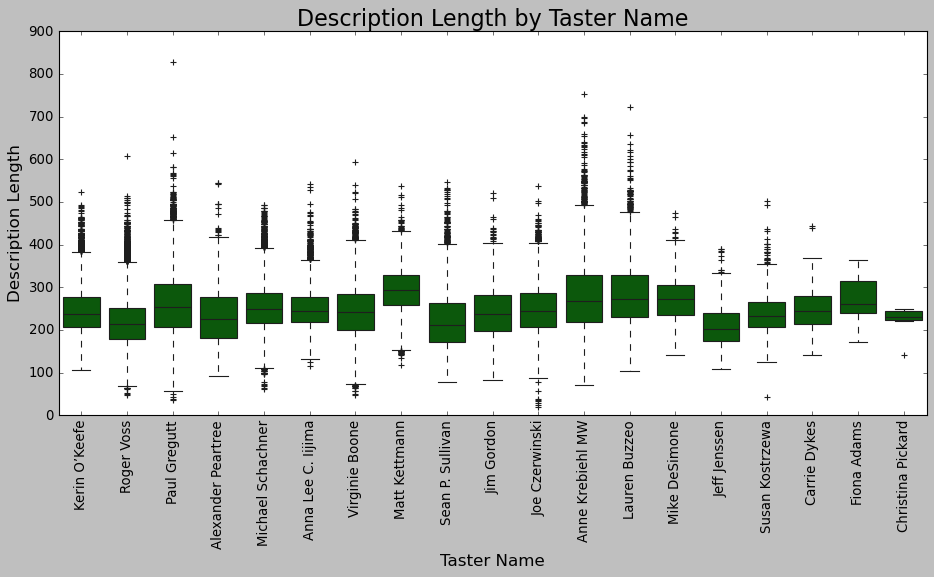

In [71]:
plt.figure(figsize=(14,6))

g=sns.boxplot(data=df_wine1, x='taster_name', y='desc_length', color='darkgreen')
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_xlabel('Taster Name', fontsize=15)
g.set_ylabel('Description Length', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

Wow, we can see a difference description length per taster name

### Scatter plot of the description length and the price

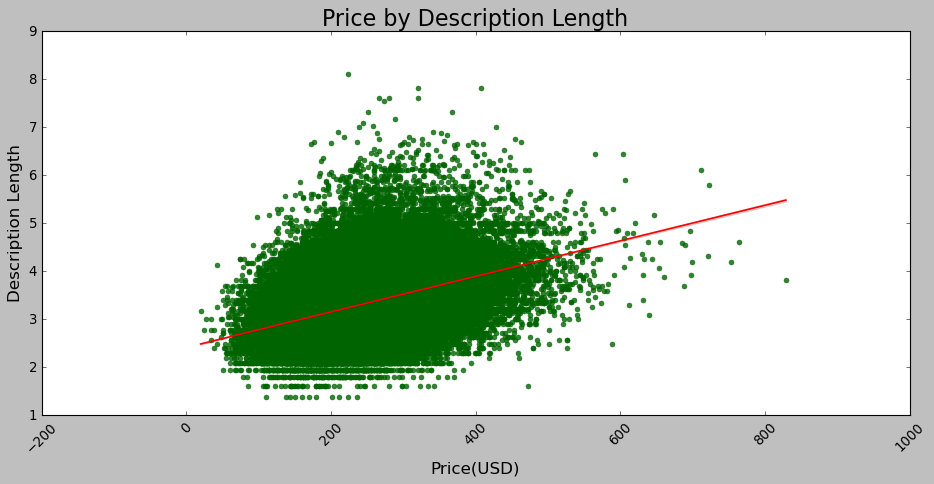

In [72]:
plt.figure(figsize=(14,6))

g=sns.regplot(data=df_wine1, x='desc_length', y='price_log',
             line_kws={'color':'red'}, fit_reg=True, color='darkgreen')
g.set_title('Price by Description Length', fontsize=20)
g.set_xlabel('Price(USD)', fontsize=15)
g.set_ylabel('Description Length', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.show()

### WORDCLOUDS OF DESCRIPTIONS

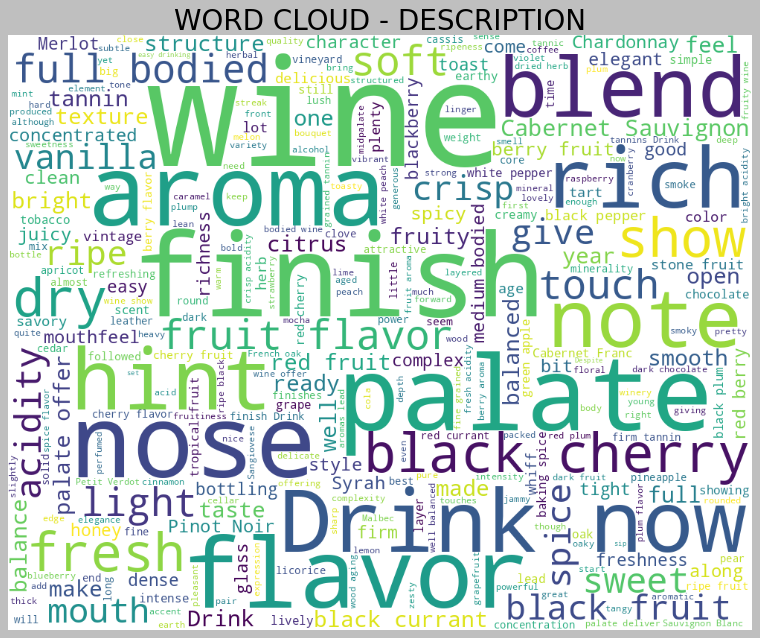

In [73]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', 'Drink', 'black', 'wine', 'drink']

wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200,
    width=1000, height=800,
    random_state=42
).generate(' '.join(df_wine1['description'].astype(str)))

print(wordcloud)
fig=plt.figure(figsize=(12,14))
plt.imshow(wordcloud)
plt.title('WORD CLOUD - DESCRIPTION', fontsize=25)
plt.axis('off')
plt.show()

### WORDCLOUD OF WINE TITLES

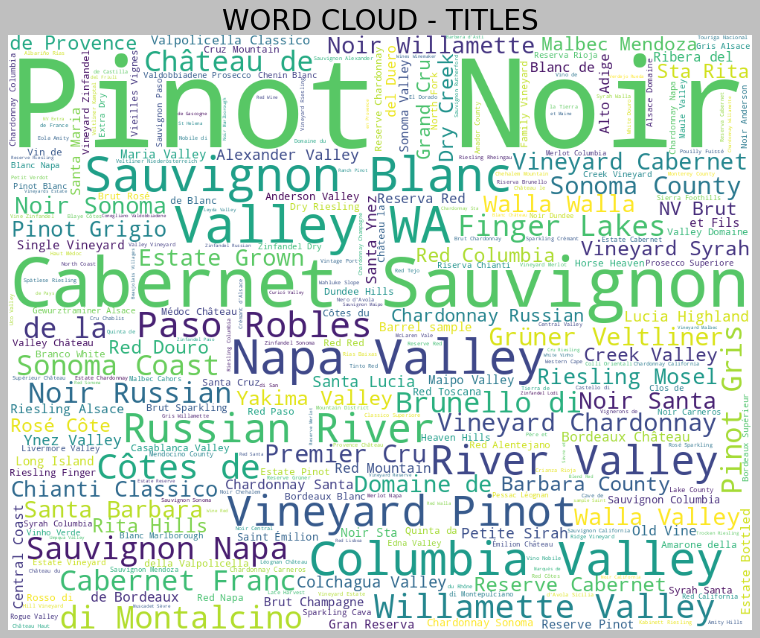

In [74]:
wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200,
    width=1000, height=800,
    random_state=42
).generate(' '.join(df_wine1['title'].astype(str)))

print(wordcloud)
fig=plt.figure(figsize=(12,14))
plt.imshow(wordcloud)
plt.title('WORD CLOUD - TITLES', fontsize=25)
plt.axis('off')
plt.show()

#### TFIDF Vectorizer in the Wine Review

##### Description N-gram

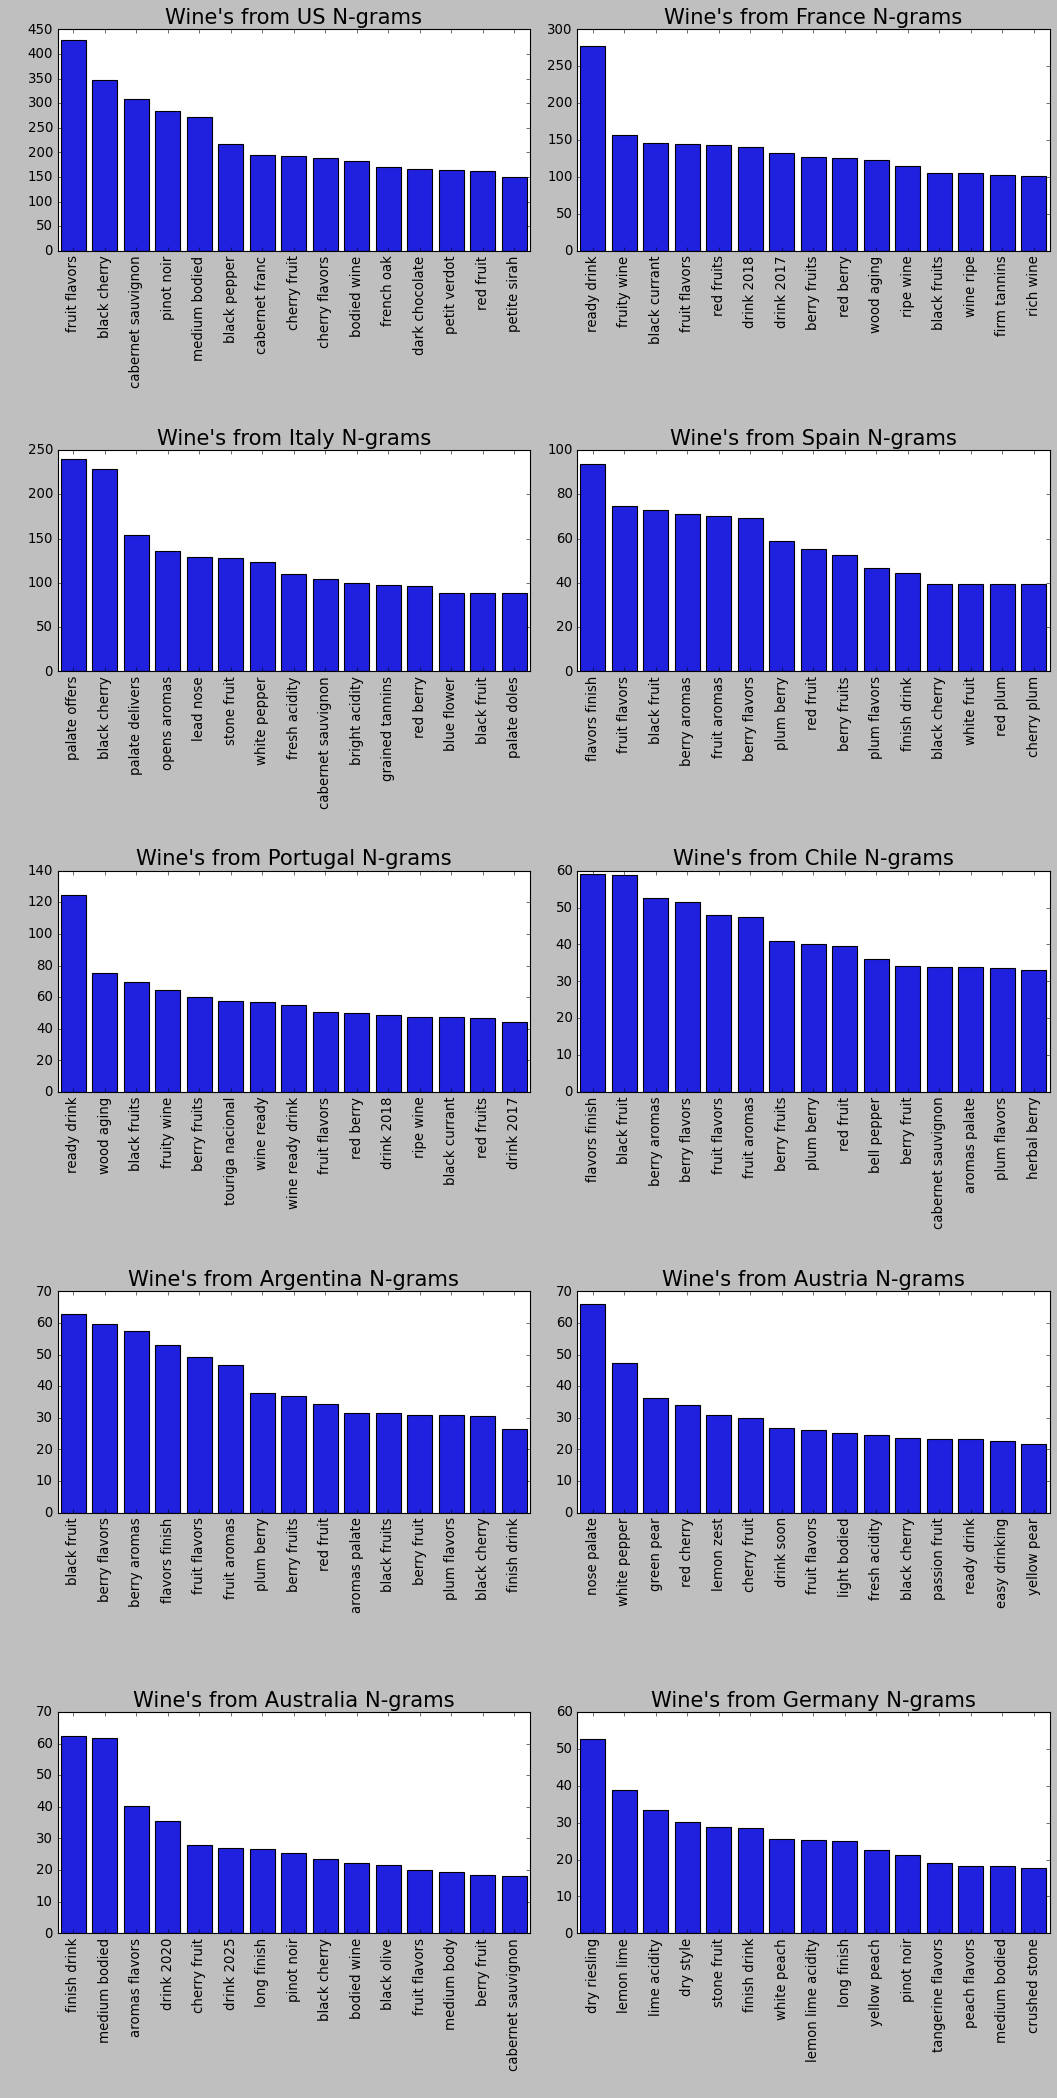

In [75]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,7*4))

for n, cat in enumerate(country.index[:10]):
    
    ax = plt.subplot(grid[n])    
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5, 
                                 stop_words='english',
                                 max_df=.5) 
    
    X2 = vectorizer.fit_transform(df_wine1.loc[(df_wine1.country == cat)]['description']) 
    features = (vectorizer.get_feature_names_out()) 
    #scores = (X2.toarray()) ---this line was throwing error !, hence commented
    
    # Getting top ranking features 
    sums = X2.sum(axis = 0) 
    data1 = [] 
    
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 

    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False))[:15]
    
    sns.barplot(x='term', y='rank', data=words, ax=ax, 
                color='blue', orient='v')
    ax.set_title(f"Wine's from {cat} N-grams", fontsize=19)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(" ")

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)

plt.show()

Very cool. It seems a very meaningful information about the wine quality and characteristics. Let's try to explore it further below;
I will try to create an Tfidf to each different country.

### Sentiment Analysis


In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download()

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = df_wine1.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'
# ------------ Didn't Show Any Output------------------------------------

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


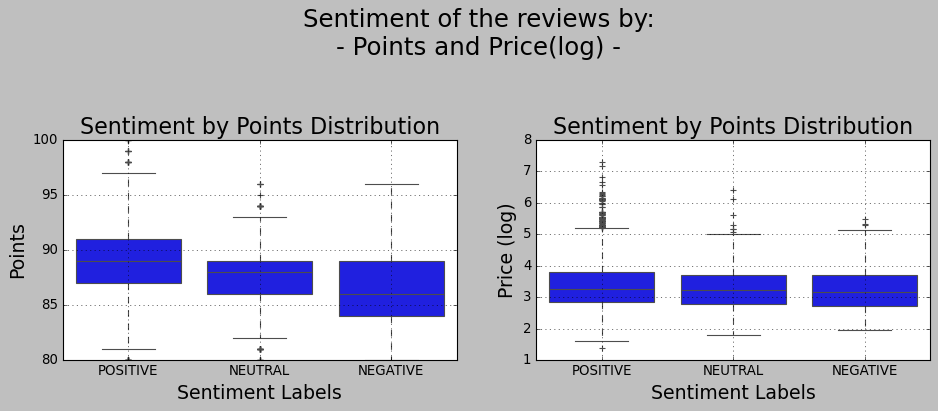

In [77]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) - ', size=22)

plt.subplot(1,2,1)
ax=sns.boxplot(data=sentiment, x='sentiment', y='points')
ax.set_title('Sentiment by Points Distribution', fontsize=20)
ax.set_xlabel('Sentiment Labels', fontsize=17)
ax.set_ylabel('Points', fontsize=17)
plt.grid()

plt.subplot(1,2,2)
ax1=sns.boxplot(data=sentiment, x='sentiment', y='price_log')
ax1.set_title('Sentiment by Points Distribution', fontsize=20)
ax1.set_xlabel('Sentiment Labels', fontsize=17)
ax1.set_ylabel('Price (log)', fontsize=17)
plt.grid()

plt.subplots_adjust(top=.65, wspace=.2)


plt.show()

## Recommender System using a Collaborative Filtering method
#### A small recommender system is made using Nearest Neighbors algorithm.

- Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
- Closer the vectors, smaller will be the angle and larger the cosine
#### NEXT STEPS: I want to implement a recommender system using the Description

#### Needed Libraries

In [80]:
from sklearn.neighbors import NearestNeighbors #KNN Clustering
from scipy.sparse import csr_matrix # Compressed Sparse Row Matrix
from sklearn.decomposition import TruncatedSVD # Dimensionality Reduction

#### Transforming the Columns

In [94]:
# Lets choice rating of wine is points, title as user_id, and variety
col=['province','variety','points']

wine1=df_wine1[col]
wine1=wine1.dropna(axis=0)
wine1=wine1.drop_duplicates(subset=['province','variety'])
wine1=wine1[wine1['points']>85]

wine_pivot=wine1.pivot(index='variety', columns='province', values='points').fillna(0)
wine_pivot_matrix=csr_matrix(wine_pivot)

In [96]:
wine_pivot_matrix

<621x394 sparse matrix of type '<class 'numpy.float64'>'
	with 3033 stored elements in Compressed Sparse Row format>

#### Instantiating the KNN algorithmn and fiting in the Wine Matrix

In [97]:
knn=NearestNeighbors(n_neighbors=10, algorithm='brute', metric='cosine')
model_knn=knn.fit(wine_pivot_matrix)

In [106]:
for i in range(5):
    query_index=np.random.choice(wine_pivot.shape[0])
    distance, indice=model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),
                                         n_neighbors=6)
    for i in range(0,len(distance.flatten())):
        if i==0:
            print('Recommendation for `{0}:`'.format(wine_pivot.index[query_index]))
        else:
            print('{0}:{1} with distance: {2}'.format(i, wine_pivot.index[indice.flatten()[i]],
                                                                         distance.flatten()[i]))
    print('\n')

Recommendation for `Primitivo:`
1:Muscat Canelli with distance: 0.3208480349969821
2:Dolcetto with distance: 0.33111124806893444
3:Tinta Amarela with distance: 0.4094553271676532
4:Viognier-Gewürztraminer with distance: 0.4094553271676532
5:Tempranillo-Syrah with distance: 0.4094553271676532


Recommendation for `Mission:`
1:Malbec-Syrah with distance: 0.0
2:Roussanne-Grenache Blanc with distance: 0.0
3:Carignane with distance: 0.0
4:Pinot Blanc-Viognier with distance: 0.0
5:Mission with distance: 0.0


Recommendation for `Tinto Fino:`
1:Verdejo-Viura with distance: 0.0
2:Maturana with distance: 0.0
3:Tinta del Toro with distance: 0.0
4:Vidadillo with distance: 0.0
5:Tinta del Pais with distance: 0.0


Recommendation for `Tempranillo-Cabernet Sauvignon:`
1:Monastrell with distance: 0.1283537456089653
2:Cabernet Sauvignon-Tempranillo with distance: 0.1383002917261238
3:Garnacha with distance: 0.2579747184425991
4:Souzao with distance: 0.27538864716282807
5:Counoise with distance: 0.2753